# Import

In [1]:
%%capture
!pip install cltk

In [152]:
from cltk.stop.greek.stops import STOPS_LIST # for processing
stops = STOPS_LIST

In [3]:
## Set up for lemmatization, stop word filtering 
import pandas as pd 
import os
from cltk.stop.greek.stops import STOPS_LIST # for processing
from cltk.corpus.utils.importer import CorpusImporter # For comparison later 
corpusimporter = CorpusImporter('greek') # For comparison later 
from cltk.stem.lemma import LemmaReplacer # For processing 
from cltk.corpus.utils.formatter import cltk_normalize # Helps with processing

from itertools import chain

stops = STOPS_LIST 

punct = ['.', '(', ')', ',', "'", '"']
LATIN = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q', 'r', 's', 't','u','v','w','x','y','z']
LATIN.append([letter.capitalize() for letter in LATIN])
latin = list(chain(*LATIN))

corpus_importer = CorpusImporter('greek')
corpus_importer.import_corpus('greek_models_cltk')
lemmatizer = LemmaReplacer('greek')

from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('greek')
# word_tokenizer.tokenize().lower()
# [token for token in athenaeus_word_tokens if token not in ['.', ',', ':', ';']]

from cltk.stem.lemma import LemmaReplacer
lemmatizer = LemmaReplacer('greek')
# lemmata = lemmatizer.lemmatize()

words_df = pd.read_csv('outputs/words_df.csv')

In [4]:
from cltk.tokenize.sentence import TokenizeSentence
sentence_tokenizer = TokenizeSentence('greek')

from cltk.tokenize.word import WordTokenizer
word_tokenizer = WordTokenizer('greek')

In [13]:
def clean_text(text): 
    """tokenizes text chunks. Returns list of words in a text chunk"""
    punct = ['.', '(', ')', ',', "'", '"']
    try:    
        words = word_tokenizer.tokenize(text.lower())
        words = [word for word in words if word not in [punct, stops]] # clean up words 
    except AttributeError as e: 
        print('failed at', )
    return words
    

In [14]:
def process_author(author): 
    author_words = []
    for text in author: 
        add = clean_text(text.lower())
        author_words.append(add)
    return author_words

In [5]:
from collections import Counter

In [163]:
from itertools import chain
test = list(chain(*test))
count = Counter(test)

In [6]:
df = words_df

In [19]:
df['text'] = df['clean_words'].apply(lambda x: ''.join(str(x)))
    

In [56]:
pd.set_option.max_colwidth = 999
df.clean_words.head(10)

0    ['ἡ', 'κανδαύλου', 'γυνὴ', 'ἧς', 'ἡρόδοτος', '...
1    ['βατὴ', 'δῆμος', 'τῆς', 'αἰγηίδος', 'φυλῆς', ...
2    ['ἐκ', 'τῶν', 'ἀβυδηνοῦ', 'περὶ', 'τῆς', 'τῶν'...
3    ['εἶπον', 'ὅτι', 'καὶ', 'πελίαν', 'θάπτων', 'ἄ...
4    ['ἡσίοδος', 'χάους', 'καὶ', 'γῆς', 'ἔρωτα', 'υ...
5    ['αἴλιος', 'δῖος', 'ἐν', 'τῷ', 'περὶ', 'ἀλεξαν...
6    ['ἁρποκρατίων', 'ὁ', 'αἴλιος', 'χρηματίσας', '...
7    ['τούτους', 'ἡρακλῆς', 'ἀνεῖλεν', 'ὕστερον', '...
8    ['ἐν', 'ἰκάρῳ', 'τῆς', 'ἀρτέμιδος', 'τὸ', 'ἄγα...
9    ['φησὶ', 'γοῦν', 'ἀγαθαρχίδης', 'ἐν', 'ἕκτῃ', ...
Name: clean_words, dtype: object

In [58]:
df['text'] = df.clean_lemmata.str.replace('[', '').str.replace("]", '').str.replace(',', '').str.replace("'", '').str.replace('·','')\
.str.replace('᾽', '').str.split(' ')

In [59]:
df.head()

,author,clean_words,clean_lemmata,lexical_density,word_count,lemma_counts,unique_lemmata,weighted_average_frequency,text
0,ABAS,"['ἡ', 'κανδαύλου', 'γυνὴ', 'ἧς', 'ἡρόδοτος', '...","['ὁ', 'κανδαύλης', 'γυνὴ', 'ὅς', 'ἡρόδοτος', '...",0.722892,83,"[('ὁ', 7), ('ἡρόδοτος', 4), ('ὄνομα', 3), ('νύ...","['ὄνομα', 'ἡρόδοτος', 'ὡς', 'λέγω1', 'γένος', ...",3.877270,"[ὁ, κανδαύλης, γυνὴ, ὅς, ἡρόδοτος, οὐ, λέγω1,..."
1,ABRON VEL HABRON BATIENSIS,"['βατὴ', 'δῆμος', 'τῆς', 'αἰγηίδος', 'φυλῆς', ...","['βατὴ', 'δῆμος', 'ὁ', 'αἰγηίδος', 'φυλάζω', ...",0.937500,16,"[('ὁ', 2), ('βατὴ', 1), ('δῆμος', 1), ('αἰγηί...","['ὁ', 'ἐξηγητὴς', 'καλλίης', 'αἰγηίδος', 'περὶ...",1.543122,"[βατὴ, δῆμος, ὁ, αἰγηίδος, φυλάζω, ὅθεν, εἰμί..."
2,ABYDENUS,"['ἐκ', 'τῶν', 'ἀβυδηνοῦ', 'περὶ', 'τῆς', 'τῶν'...","['ἐκ', 'ὁ', 'ἀβυδηνός', 'περὶ', 'ὁ', 'ὁ', 'χαλ...",0.576531,392,"[('ὁ', 23), ('δὲ', 15), ('καὶ', 15), ('ἐκ', 9)...","['ἀβυδηνὸς', 'παντιβίβλιος', 'ἄνθρωπος', 'θεάω...",9.516595,"[ἐκ, ὁ, ἀβυδηνός, περὶ, ὁ, ὁ, χαλδαῖος, βασιλ..."
3,ACESANDER,"['εἶπον', 'ὅτι', 'καὶ', 'πελίαν', 'θάπτων', 'ἄ...","['εἶπον', 'ὅστις', 'καὶ', 'πελίης', 'θάπτω', '...",0.519164,287,"[('ὁ', 22), ('δὲ', 18), ('καὶ', 15), ('ἐν', 8)...","['διακομίζω', 'εὔρυτος', 'λίβυς', 'δ', 'εἶπο...",9.956201,"[εἶπον, ὅστις, καὶ, πελίης, θάπτω, ἄκαστος, ὁ,..."
4,ACUSILAUS,"['ἡσίοδος', 'χάους', 'καὶ', 'γῆς', 'ἔρωτα', 'υ...","['ἡσίοδος', 'χαόω', 'καὶ', 'γαῖα', 'ἔρως', 'υ...",0.441973,1034,"[('ὁ', 96), ('καὶ', 50), ('δὲ', 41), ('ἀκουσίλ...","['ὤγυγος', 'καταλύω', 'λητοῦς·', 'ποταμός', 'μ...",28.055590,"[ἡσίοδος, χαόω, καὶ, γαῖα, ἔρως, υἱὸν, λέγω1,..."


In [88]:
def clean_text(text): 
    return [word for word in text if word not in stops]

In [118]:
df['text'] = df['text'].apply(clean_text)

In [92]:
import datetime

In [95]:
today = datetime.datetime.now().strftime('%Y_%m_%d')

## Lemmatize and create measures of lexical density

In [91]:
def lemmatize(text): 
    lemmata = lemmatizer.lemmatize(text)
    return lemmata

In [101]:
df.head(1)

,author,clean_words,clean_lemmata,lexical_density,word_count,lemma_counts,unique_lemmata,weighted_average_frequency,text
0,ABAS,"['ἡ', 'κανδαύλου', 'γυνὴ', 'ἧς', 'ἡρόδοτος', '...","['ὁ', 'κανδαύλης', 'γυνὴ', 'ὅς', 'ἡρόδοτος', '...",0.722892,83,"[('ὁ', 7), ('ἡρόδοτος', 4), ('ὄνομα', 3), ('νύ...","['ὄνομα', 'ἡρόδοτος', 'ὡς', 'λέγω1', 'γένος', ...",3.87727,"[κανδαύλης, γυνὴ, ἡρόδοτος, οὐ, λέγω1, ὄνομα,..."


In [117]:
stops.append('᾽')

In [122]:
a = ['a' ,',', 'a']

In [125]:
def unique_lemmas(text): 
    return list(set(text))

In [126]:
df['unique_lemmata'] = df['text'].apply(unique_lemmas)

In [156]:
from collections import Counter 

def word_counter(words): 
    return Counter(words)

df['lemma_counts'] = df['text'].apply(word_counter) # creates dictionary 

import operator 
df['lemma_counts'] = df['lemma_counts']\
.apply(lambda x: sorted(x.items(), key = operator.itemgetter(1), reverse = True)) # Creates tuples 

In [129]:
df.head()

,author,clean_words,clean_lemmata,lexical_density,word_count,lemma_counts,unique_lemmata,weighted_average_frequency,text
0,ABAS,"['ἡ', 'κανδαύλου', 'γυνὴ', 'ἧς', 'ἡρόδοτος', '...","['ὁ', 'κανδαύλης', 'γυνὴ', 'ὅς', 'ἡρόδοτος', '...",0.722892,83,"[(ἡρόδοτος, 4), (ὄνομα, 3), (νύσιος, 3), (οὐ,...","[διὸ, ἣν, ὄνομα, δρακοντίτην, τυγχάνω, ὀξυωπής...",3.877270,"[κανδαύλης, γυνὴ, ἡρόδοτος, οὐ, λέγω1, ὄνομα,..."
1,ABRON VEL HABRON BATIENSIS,"['βατὴ', 'δῆμος', 'τῆς', 'αἰγηίδος', 'φυλῆς', ...","['βατὴ', 'δῆμος', 'ὁ', 'αἰγηίδος', 'φυλάζω', ...",0.937500,16,"[(βατὴ, 1), (δῆμος, 1), (αἰγηίδος, 1), (φυλάζ...","[βατὴ, ὅθεν, φυλάζω, καλλίης, αἰγηίδος, ἐξηγητ...",1.543122,"[βατὴ, δῆμος, αἰγηίδος, φυλάζω, ὅθεν, εἰμί, ἄ..."
2,ABYDENUS,"['ἐκ', 'τῶν', 'ἀβυδηνοῦ', 'περὶ', 'τῆς', 'τῶν'...","['ἐκ', 'ὁ', 'ἀβυδηνός', 'περὶ', 'ὁ', 'ὁ', 'χαλ...",0.576531,392,"[(̓, 9), (σαρόω, 7), (εἰμί, 7), (βασιλεύω, 5),...","[ἡμερέῃ, ἑαυτοῦ, ἀννήδωτον, ῥώμη, δʹ, τιτάν, ...",9.516595,"[ἀβυδηνός, χαλδαῖος, βασιλειάω, χαλδαῖος, σο..."
3,ACESANDER,"['εἶπον', 'ὅτι', 'καὶ', 'πελίαν', 'θάπτων', 'ἄ...","['εἶπον', 'ὅστις', 'καὶ', 'πελίης', 'θάπτω', '...",0.519164,287,"[(κυρήνη, 7), (ἀκέσανδρος, 6), (φημί, 5), (λιβ...","[, πηνειός, ἀναγράφω, πίνδαρος, θεόχρηστος, πα...",9.956201,"[εἶπον, πελίης, θάπτω, ἄκαστος, υἱὸς, ἀγών, πο..."
4,ACUSILAUS,"['ἡσίοδος', 'χάους', 'καὶ', 'γῆς', 'ἔρωτα', 'υ...","['ἡσίοδος', 'χαόω', 'καὶ', 'γαῖα', 'ἔρως', 'υ...",0.441973,1034,"[(ἀκουσίλαος, 32), (λέγω1, 13), (εἰμί, 12), (̓...","[, ἑαυτοῦ, ἔξεστι, μίγνυμι, οὐδὲν, μῆτις, ἥρ...",28.055590,"[ἡσίοδος, χαόω, γαῖα, ἔρως, υἱὸν, λέγω1, ...,..."


In [163]:
most_frequent_words = Counter(df['text'].sum())
most_frequent_words = sorted(most_frequent_words.items(), key = operator.itemgetter(1), reverse = True)
most_frequent_words = pd.DataFrame(most_frequent_words)

In [164]:
most_frequent_words.rename(columns = {0: 'word', 1: 'count'}, inplace = True)

In [165]:
most_frequent_words

,word,count
0,εἰμί,5229
1,οὐ,2620
2,φημί,2476
3,γίγνομαι,2190
4,,1932
...,...,...
41753,χρήσθαι,1
41754,πρεὶ,1
41755,στεφανωτικός,1
41756,ἡγησίας,1


In [166]:
df.to_csv('outputs/df_final.csv')

In [169]:
most_frequent_words['count'].sum() / 10000

29.6113

In [170]:
most_frequent_words['per_10k'] = most_frequent_words['count'] / 29.6113

In [172]:
most_frequent_words['inv_freq'] = 1/ most_frequent_words['per_10k']

In [173]:
most_frequent_words.head()

,word,count,per_10k,inv_freq
0,εἰμί,5229,176.587992,0.005663
1,οὐ,2620,88.479736,0.011302
2,φημί,2476,83.616727,0.011959
3,γίγνομαι,2190,73.958252,0.013521
4,,1932,65.245362,0.015327


In [174]:
def weighted_word_freq(word_tuples): 
    tups = word_tuples
    weight_sum = 0
    value_sum = 0  
    for tup in tups: 
        try: 
            weight = most_frequent_words.loc[most_frequent_words['word'] == tup[0], 'inv_freq'].values[0]
            weight_sum += weight 
            value_sum += weight * tup[1]
        except: 
            pass 
    if weight_sum == 0:
        weight_sum = 1 
    else:
        return value_sum / weight_sum

In [175]:
df.head()

,author,clean_words,clean_lemmata,lexical_density,word_count,lemma_counts,unique_lemmata,weighted_average_frequency,text
0,ABAS,"['ἡ', 'κανδαύλου', 'γυνὴ', 'ἧς', 'ἡρόδοτος', '...","['ὁ', 'κανδαύλης', 'γυνὴ', 'ὅς', 'ἡρόδοτος', '...",0.722892,83,"[(ἡρόδοτος, 4), (ὄνομα, 3), (νύσιος, 3), (οὐ,...","[διὸ, ἣν, ὄνομα, δρακοντίτην, τυγχάνω, ὀξυωπής...",3.877270,"[κανδαύλης, γυνὴ, ἡρόδοτος, οὐ, λέγω1, ὄνομα,..."
1,ABRON VEL HABRON BATIENSIS,"['βατὴ', 'δῆμος', 'τῆς', 'αἰγηίδος', 'φυλῆς', ...","['βατὴ', 'δῆμος', 'ὁ', 'αἰγηίδος', 'φυλάζω', ...",0.937500,16,"[(βατὴ, 1), (δῆμος, 1), (αἰγηίδος, 1), (φυλάζ...","[βατὴ, ὅθεν, φυλάζω, καλλίης, αἰγηίδος, ἐξηγητ...",1.543122,"[βατὴ, δῆμος, αἰγηίδος, φυλάζω, ὅθεν, εἰμί, ἄ..."
2,ABYDENUS,"['ἐκ', 'τῶν', 'ἀβυδηνοῦ', 'περὶ', 'τῆς', 'τῶν'...","['ἐκ', 'ὁ', 'ἀβυδηνός', 'περὶ', 'ὁ', 'ὁ', 'χαλ...",0.576531,392,"[(σαρόω, 7), (εἰμί, 7), (βασιλεύω, 5), (λέγω1,...","[ἡμερέῃ, ἑαυτοῦ, ἀννήδωτον, ῥώμη, δʹ, τιτάν, ...",9.516595,"[ἀβυδηνός, χαλδαῖος, βασιλειάω, χαλδαῖος, σο..."
3,ACESANDER,"['εἶπον', 'ὅτι', 'καὶ', 'πελίαν', 'θάπτων', 'ἄ...","['εἶπον', 'ὅστις', 'καὶ', 'πελίης', 'θάπτω', '...",0.519164,287,"[(κυρήνη, 7), (ἀκέσανδρος, 6), (φημί, 5), (λιβ...","[, πηνειός, ἀναγράφω, πίνδαρος, θεόχρηστος, πα...",9.956201,"[εἶπον, πελίης, θάπτω, ἄκαστος, υἱὸς, ἀγών, πο..."
4,ACUSILAUS,"['ἡσίοδος', 'χάους', 'καὶ', 'γῆς', 'ἔρωτα', 'υ...","['ἡσίοδος', 'χαόω', 'καὶ', 'γαῖα', 'ἔρως', 'υ...",0.441973,1034,"[(ἀκουσίλαος, 32), (λέγω1, 13), (εἰμί, 12), (α...","[, ἑαυτοῦ, ἔξεστι, μίγνυμι, οὐδὲν, μῆτις, ἥρ...",28.055590,"[ἡσίοδος, χαόω, γαῖα, ἔρως, υἱὸν, λέγω1, ...,..."


In [176]:
df['weighted_frequency']=df['lemma_counts'].apply(weighted_word_freq)

In [185]:
df['weighted_frequency_z'] = (df['weighted_frequency'] - df['weighted_frequency'].mean()) / df['weighted_frequency'].std()

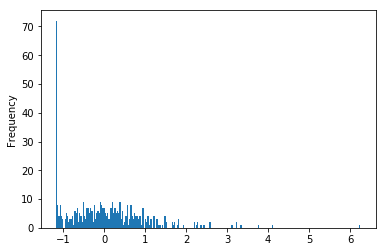

In [195]:
df.weighted_frequency_z.plot(kind = 'hist', bins = 250)

In [198]:
df[df['weighted_frequency_z'] < -1]

,author,clean_words,clean_lemmata,lexical_density,word_count,lemma_counts,unique_lemmata,weighted_average_frequency,text,weighted_frequency,weighted_frequency_z
1,ABRON VEL HABRON BATIENSIS,"['βατὴ', 'δῆμος', 'τῆς', 'αἰγηίδος', 'φυλῆς', ...","['βατὴ', 'δῆμος', 'ὁ', 'αἰγηίδος', 'φυλάζω', ...",0.937500,16,"[(βατὴ, 1), (δῆμος, 1), (αἰγηίδος, 1), (φυλάζ...","[βατὴ, ὅθεν, φυλάζω, καλλίης, αἰγηίδος, ἐξηγητ...",1.543122,"[βατὴ, δῆμος, αἰγηίδος, φυλάζω, ὅθεν, εἰμί, ἄ...",1.000000,-1.169298
6,AELIUS HARPOCRATION,"['ἁρποκρατίων', 'ὁ', 'αἴλιος', 'χρηματίσας', '...","['ἁρποκρατίων', 'ὁ', 'αἴλιος', 'χρηματίζω', 'σ...",0.727273,33,"[(ἁρποκρατίων, 1), (αἴλιος, 1), (χρηματίζω, 1)...","[ὑπέρεἶδον, ξενοφῶν, γράφω, καταψεύδομαι, ὑπό...",3.717404,"[ἁρποκρατίων, αἴλιος, χρηματίζω, σοφιστής, γρά...",1.000000,-1.169298
7,AENESIDEMUS,"['τούτους', 'ἡρακλῆς', 'ἀνεῖλεν', 'ὕστερον', '...","['οὗτος', 'ἡρακλέης', 'ἀναιρέω', 'ὕστερος', 'ε...",0.861111,36,"[(ἡρακλέης, 3), (ἐπειδὴ, 2), (ἀναιρέω, 1), (ὕσ...","[:, ἡρακλέης, φονεύω, ..., μνησικακέω, ;, αἰνη...",1.245221,"[ἡρακλέης, ἀναιρέω, ὕστερος, εὑρὼν, ἐκεῖνος, ...",1.002499,-1.121916
14,AGESILAUS,"['φουλούιος', 'στέλλες', 'μισῶν', 'γυναῖκας', ...","['φουλούιος', 'στέλλες', 'μισέω', 'γυνή', 'ἵππ...",0.962963,27,"[(φουλούιος, 1), (στέλλες, 1), (μισέω, 1), (γυ...","[ἵππων, τρίτος, θεὸς, γυνή, ἔποναν, ἰταλικός, ...",1.130487,"[φουλούιος, στέλλες, μισέω, γυνή, ἵππος, συνεμ...",1.000000,-1.169298
15,AGLAOSTHENES,"[';', 'ἀγλαοσθένης', 'δέ', 'φησιν', 'ἐν', 'τοῖ...","[';', 'ἀγλαοσθένης', 'δέ', 'φημί', 'ἐν', 'ὁ', ...",0.777778,72,"[(γίγνομαι, 2), (;, 1), (ἀγλαοσθένης, 1), (δέ,...","[ἀγλωσθένους, ναξιακοῖς, κρήτη, ἀγλαοσθένης, ἐ...",3.100289,"[;, ἀγλαοσθένης, δέ, φημί, ναξιακοῖς, γίγνομαι...",1.000065,-1.168061
...,...,...,...,...,...,...,...,...,...,...,...
451,THEODORUS RHODIUS,"['πανικῷ', 'δείματι', 'τοῦτο', 'γίνεται', 'ἐπὶ...","['πανικός', 'δεῖμα', 'οὗτος', 'γίγνομαι', 'ἐπ...",0.740260,77,"[(γίγνομαι, 2), (..., 2), (εἰμί, 2), (ὅπλον, 2...","[ὑπόμνημα, ῥοδίων, πολεμέω, ἀνθίστημι, μένω, ἀ...",4.183790,"[πανικός, δεῖμα, γίγνομαι, στρατόπεδον, ἡνίκα...",1.005179,-1.071115
452,THEODORUS SAMOTHRAX,"['θεόδωρος', 'ὁ', 'σαμοθρᾲξ', 'τὸν', 'δία', 'φ...","['θεόδωρος', 'ὁ', 'σαμοθρᾲξ', 'τὸν', 'δῖος', ...",0.950000,20,"[(θεόδωρος, 1), (σαμοθρᾲξ, 1), (δῖος, 1), (φη...","[ἀριθμός, φησὶ, σαμοθρᾲξ, ἕβδομος, θεόδωρος, δ...",1.496039,"[θεόδωρος, σαμοθρᾲξ, δῖος, φησὶ, γεννάω, ἑπτὰ...",1.000000,-1.169298
469,TIMOTHEUS,"['εὑρίσκεται', 'δ', '̓', 'ἐν', 'αὐτῷ', 'τῷ', '...","['εὑρίσκω', 'δ', '̓', 'ἐν', 'αὐτός', 'ὁ', 'ἴν...",0.823529,34,"[(εὑρίσκω, 1), (αὐτός, 1), (ἴναχος, 1), (λίθο...","[κρατέω, ἴναχος, τιμόθεος, παρόμοιος, ὃν, μέλα...",2.807924,"[εὑρίσκω, ἴναχος, λίθος, βήρυλλος, παρόμοιος, ...",1.000000,-1.169298
474,XENOCRATES,"['ἀσσυρία', 'ἡ', 'βαβυλωνία', 'τὸ', 'μὲν', 'πρ...","['ἀσσύριος', 'ὁ', 'βαβυλώνιος', 'τὸ', 'μὲν', '...",0.791667,24,"[(ἀσσύριος, 2), (πρότερος, 2), (βαβυλώνιος, 1)...","[εὔφρατις, χαλδαία, ἀσσύριος, ξενοκράτης, βαβυ...",1.764000,"[ἀσσύριος, βαβυλώνιος, πρότερος, καλέω, εὔφρατ...",1.006674,-1.042758
